# 07.04 - Dashboard con Matplotlib

**Autor:** Miguel Angel Vazquez Varela  
**Nivel:** Intermedio-Avanzado  
**Tiempo estimado:** 35 min

---

## Objetivo

Crear un **dashboard completo** de analisis de viajes en bici, combinando:
- Multiples graficos en una figura
- Anotaciones y textos
- Estilos profesionales
- Exportacion de alta calidad

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Patch
import numpy as np
import pandas as pd

# Configuracion global
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10

---

## 1. Generar datos realistas

In [2]:
np.random.seed(42)

# Datos mensuales
months = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
          'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Patron estacional (mas viajes en verano)
seasonal = [0.7, 0.75, 0.85, 0.9, 1.0, 1.1, 1.15, 1.1, 1.0, 0.85, 0.75, 0.7]
base_trips = 50000

monthly_trips = [int(base_trips * s + np.random.normal(0, 2000)) for s in seasonal]

# Datos por estacion
stations = ['Sol', 'Atocha', 'Cibeles', 'Retiro', 'Gran Via']
station_trips = [18500, 15200, 12800, 11500, 9000]

# Datos por hora
hours = list(range(24))
# Patron bimodal: picos en hora punta
hourly_pattern = [
    100, 50, 30, 20, 30, 80,      # 0-5
    200, 450, 800, 600, 400, 350, # 6-11  
    400, 450, 500, 550, 600, 750, # 12-17
    900, 700, 500, 350, 250, 150  # 18-23
]

# Datos por tipo de usuario
user_types = ['Subscriber', 'Casual']
user_counts = [485000, 165000]

# Duraciones para histograma
durations_sub = np.random.gamma(shape=3, scale=5, size=1000)
durations_cas = np.random.gamma(shape=2, scale=10, size=500)

# KPIs
total_trips = sum(monthly_trips)
avg_duration = 18.5
total_distance = 892000
co2_saved = 178.4  # toneladas

---

## 2. Paleta de colores profesional

In [3]:
# Paleta personalizada
COLORS = {
    'primary': '#2C3E50',      # Azul oscuro
    'secondary': '#3498DB',    # Azul claro
    'accent': '#E74C3C',       # Rojo
    'success': '#27AE60',      # Verde
    'warning': '#F39C12',      # Naranja
    'light': '#ECF0F1',        # Gris claro
    'text': '#2C3E50'          # Texto
}

# Paleta para barras
BAR_COLORS = ['#3498DB', '#2ECC71', '#E74C3C', '#F39C12', '#9B59B6']

---

## 3. Crear el dashboard

C:\Users\migue\AppData\Local\Temp\ipykernel_32920\3781871447.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.02, 1, 0.96])


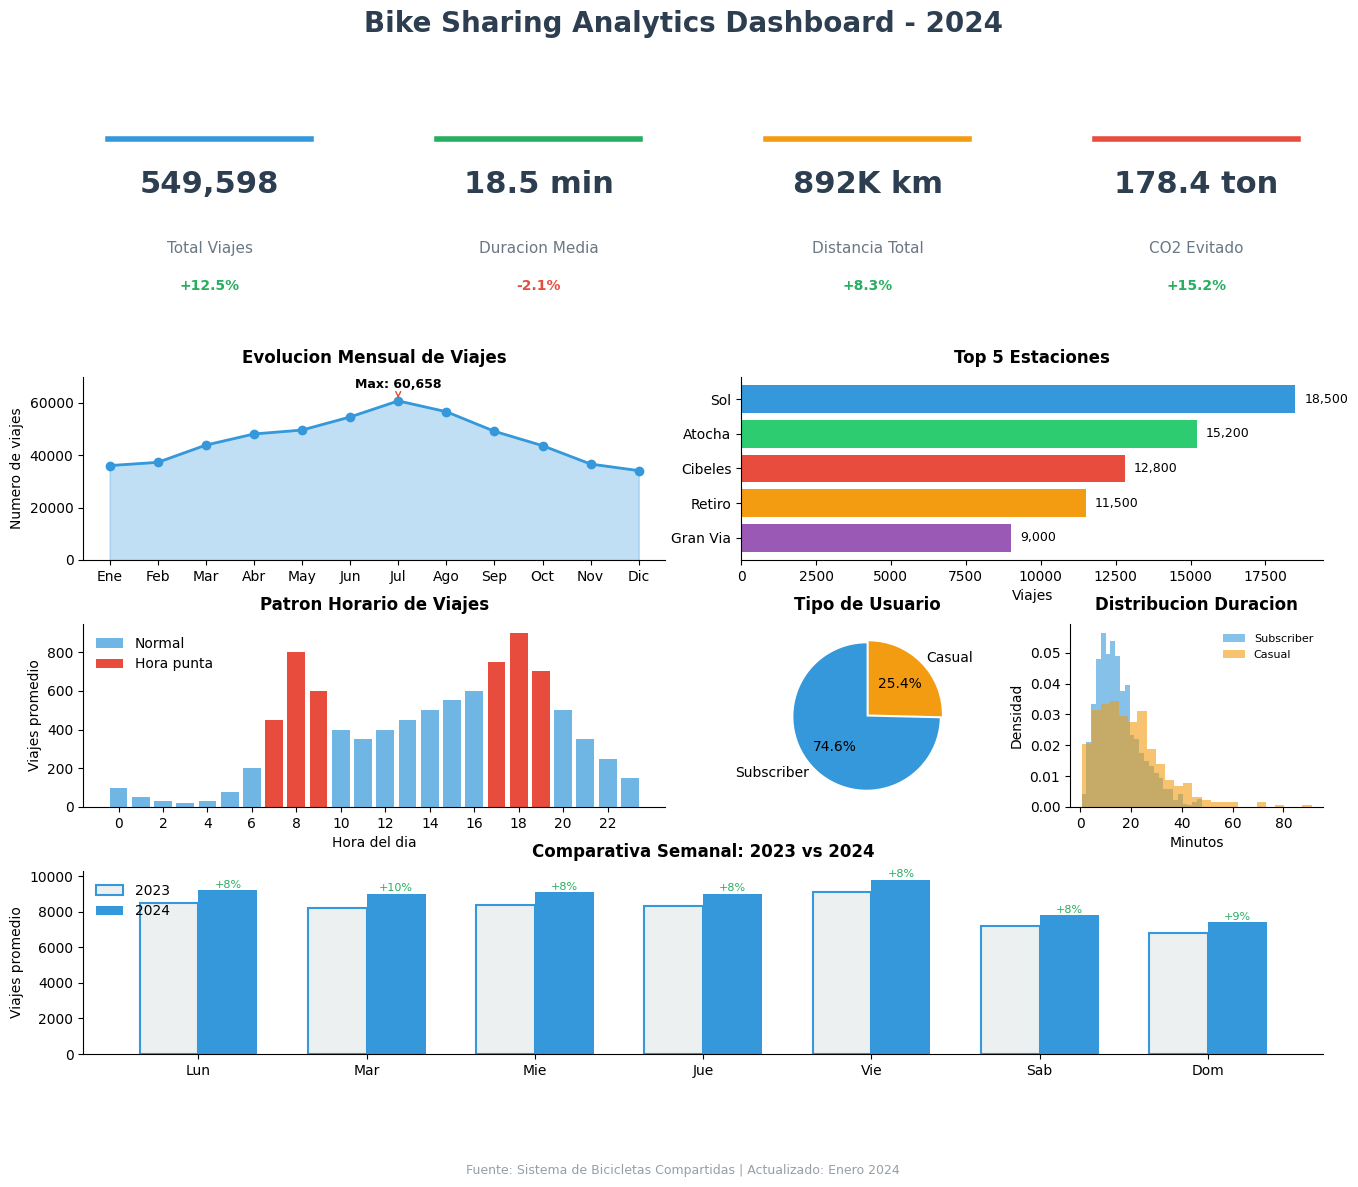

In [4]:
# Crear figura con GridSpec para layout flexible
fig = plt.figure(figsize=(16, 12), facecolor='white')

# Definir grid: 4 filas, 4 columnas
gs = gridspec.GridSpec(4, 4, figure=fig, hspace=0.35, wspace=0.3)

# --- TITULO PRINCIPAL ---
fig.suptitle('Bike Sharing Analytics Dashboard - 2024', 
             fontsize=20, fontweight='bold', color=COLORS['primary'], y=0.98)

# --- FILA 1: KPIs (4 tarjetas) ---
kpis = [
    ('Total Viajes', f'{total_trips:,}', '+12.5%', COLORS['secondary']),
    ('Duracion Media', f'{avg_duration} min', '-2.1%', COLORS['success']),
    ('Distancia Total', f'{total_distance/1000:.0f}K km', '+8.3%', COLORS['warning']),
    ('CO2 Evitado', f'{co2_saved} ton', '+15.2%', COLORS['accent'])
]

for i, (title, value, change, color) in enumerate(kpis):
    ax = fig.add_subplot(gs[0, i])
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    
    # Fondo con borde coloreado
    ax.axhline(y=0.95, color=color, linewidth=4, xmin=0.1, xmax=0.9)
    
    # Textos
    ax.text(0.5, 0.7, value, fontsize=22, fontweight='bold', 
            ha='center', va='center', color=COLORS['primary'])
    ax.text(0.5, 0.35, title, fontsize=11, ha='center', va='center', 
            color=COLORS['text'], alpha=0.7)
    
    # Cambio porcentual
    change_color = COLORS['success'] if '+' in change else COLORS['accent']
    ax.text(0.5, 0.15, change, fontsize=10, ha='center', va='center',
            color=change_color, fontweight='bold')

# --- FILA 2 IZQUIERDA: Evolucion mensual ---
ax1 = fig.add_subplot(gs[1, :2])
ax1.fill_between(months, monthly_trips, alpha=0.3, color=COLORS['secondary'])
ax1.plot(months, monthly_trips, marker='o', linewidth=2, 
         color=COLORS['secondary'], markersize=6)
ax1.set_title('Evolucion Mensual de Viajes', fontweight='bold', pad=10)
ax1.set_ylabel('Numero de viajes')
ax1.set_ylim(0, max(monthly_trips) * 1.15)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Anotar maximo
max_idx = monthly_trips.index(max(monthly_trips))
ax1.annotate(f'Max: {max(monthly_trips):,}', 
             xy=(max_idx, max(monthly_trips)),
             xytext=(max_idx, max(monthly_trips) * 1.08),
             ha='center', fontsize=9, fontweight='bold',
             arrowprops=dict(arrowstyle='->', color=COLORS['accent']))

# --- FILA 2 DERECHA: Top estaciones ---
ax2 = fig.add_subplot(gs[1, 2:])
bars = ax2.barh(stations[::-1], station_trips[::-1], color=BAR_COLORS[::-1])
ax2.set_title('Top 5 Estaciones', fontweight='bold', pad=10)
ax2.set_xlabel('Viajes')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Etiquetas en barras
for bar, val in zip(bars, station_trips[::-1]):
    ax2.text(val + 300, bar.get_y() + bar.get_height()/2, 
             f'{val:,}', va='center', fontsize=9)

# --- FILA 3 IZQUIERDA: Patron horario ---
ax3 = fig.add_subplot(gs[2, :2])
ax3.bar(hours, hourly_pattern, color=COLORS['secondary'], alpha=0.7, width=0.8)

# Destacar horas punta
rush_morning = [7, 8, 9]
rush_evening = [17, 18, 19]
for h in rush_morning + rush_evening:
    ax3.bar(h, hourly_pattern[h], color=COLORS['accent'], width=0.8)

ax3.set_title('Patron Horario de Viajes', fontweight='bold', pad=10)
ax3.set_xlabel('Hora del dia')
ax3.set_ylabel('Viajes promedio')
ax3.set_xticks(range(0, 24, 2))
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# Leyenda
legend_elements = [Patch(facecolor=COLORS['secondary'], alpha=0.7, label='Normal'),
                   Patch(facecolor=COLORS['accent'], label='Hora punta')]
ax3.legend(handles=legend_elements, loc='upper left', frameon=False)

# --- FILA 3 DERECHA: Tipo de usuario ---
ax4 = fig.add_subplot(gs[2, 2])
colors_pie = [COLORS['secondary'], COLORS['warning']]
wedges, texts, autotexts = ax4.pie(
    user_counts, 
    labels=user_types,
    colors=colors_pie,
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.02, 0.02)
)
ax4.set_title('Tipo de Usuario', fontweight='bold', pad=10)

# --- FILA 3 DERECHA 2: Histograma duraciones ---
ax5 = fig.add_subplot(gs[2, 3])
ax5.hist(durations_sub, bins=25, alpha=0.6, color=COLORS['secondary'], 
         label='Subscriber', density=True)
ax5.hist(durations_cas, bins=25, alpha=0.6, color=COLORS['warning'], 
         label='Casual', density=True)
ax5.set_title('Distribucion Duracion', fontweight='bold', pad=10)
ax5.set_xlabel('Minutos')
ax5.set_ylabel('Densidad')
ax5.legend(frameon=False, fontsize=8)
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)

# --- FILA 4: Comparativa semanal ---
ax6 = fig.add_subplot(gs[3, :])

days = ['Lun', 'Mar', 'Mie', 'Jue', 'Vie', 'Sab', 'Dom']
trips_2023 = [8500, 8200, 8400, 8300, 9100, 7200, 6800]
trips_2024 = [9200, 9000, 9100, 9000, 9800, 7800, 7400]

x = np.arange(len(days))
width = 0.35

bars1 = ax6.bar(x - width/2, trips_2023, width, label='2023', 
                color=COLORS['light'], edgecolor=COLORS['secondary'], linewidth=1.5)
bars2 = ax6.bar(x + width/2, trips_2024, width, label='2024', 
                color=COLORS['secondary'])

ax6.set_title('Comparativa Semanal: 2023 vs 2024', fontweight='bold', pad=10)
ax6.set_ylabel('Viajes promedio')
ax6.set_xticks(x)
ax6.set_xticklabels(days)
ax6.legend(frameon=False)
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)

# Calcular y mostrar % cambio
for i, (v23, v24) in enumerate(zip(trips_2023, trips_2024)):
    pct = (v24 - v23) / v23 * 100
    ax6.text(i + width/2, v24 + 150, f'+{pct:.0f}%', 
             ha='center', fontsize=8, color=COLORS['success'])

# --- PIE DE PAGINA ---
fig.text(0.5, 0.01, 'Fuente: Sistema de Bicicletas Compartidas | Actualizado: Enero 2024', 
         ha='center', fontsize=9, color=COLORS['text'], alpha=0.5)

plt.tight_layout(rect=[0, 0.02, 1, 0.96])
plt.show()

---

## 4. Guardar en alta calidad

In [5]:
# Recrear para guardar
# fig.savefig('bike_dashboard.png', dpi=300, bbox_inches='tight', facecolor='white')
# fig.savefig('bike_dashboard.pdf', bbox_inches='tight', facecolor='white')

print("Para guardar:")
print("  PNG: fig.savefig('dashboard.png', dpi=300, bbox_inches='tight')")
print("  PDF: fig.savefig('dashboard.pdf', bbox_inches='tight')")

Para guardar:
  PNG: fig.savefig('dashboard.png', dpi=300, bbox_inches='tight')
  PDF: fig.savefig('dashboard.pdf', bbox_inches='tight')


---

## 5. Tecnicas utilizadas

| Tecnica | Uso |
|---------|-----|
| `GridSpec` | Layout flexible de subplots |
| `fill_between` | Area bajo la curva |
| `annotate` | Flechas y anotaciones |
| `Patch` | Leyendas personalizadas |
| `rcParams` | Configuracion global de estilos |
| `spines` | Ocultar bordes |
| `text` | Textos libres en figura |

---

**Anterior:** [07.03 - Seaborn](07_03_seaborn.ipynb)  
**Siguiente:** [08.01 - Introduccion a GeoPandas](../08_geospatial/08_01_geopandas_intro.ipynb)